In [1]:
import numpy as np  # formaths and scientifici computing
import pandas as pd  # data processing, csv fle importing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

df_test = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

#### Sample 5 rows

In [3]:
df_train.head()

last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no

![](https://i.ibb.co/jLPttXn/Exploratory-Data-Analysis.png)

# *Data Type, Missing Values and Descriptive Statistics*

## *Feature Details :*

1. last contact date: last contact date

2. age (numeric)

3. job : type of job

4. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

5. education (categorical: "unknown","secondary","primary","tertiary")

6. default: has credit in default? (binary: "yes","no")

7. balance: average yearly balance, in euros (numeric)

8. housing: has housing loan? (binary: "yes","no")

9. loan: has personal loan? (binary: "yes","no")

10. contact: contact communication type (categorical: "unknown","telephone","cellular")

11. duration: last contact duration, in seconds (numeric)

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

*Dimension of dataset including `target`*

In [4]:
df_train.shape

(39211, 16)

***Adding Extra Column***



*add new column days from last contact date to very last contact date.*



$$ \text{number of days of last contact}_i = max(\text{last contact date}) - \text{last contact date}_i $$

In [5]:
# csat column to date and convert error date to NaT
df_train['last contact date'] = pd.to_datetime(df_train['last contact date'], errors='coerce')

# get max of last contact date
very_last_date = df_train['last contact date'].max()


# get days of each row from last date
days_last_contact = (very_last_date - df_train['last contact date']).dt.days


# insert new column to df
df_train.insert(0, 'days_last_contact', days_last_contact)





# adding same column to test data
df_test['last contact date'] = pd.to_datetime(df_test['last contact date'], errors='coerce')
very_last_date = df_test['last contact date'].max()
days_last_contact = (very_last_date - df_test['last contact date']).dt.days
df_test.insert(0, 'days_last_contact', days_last_contact)

*Dataframe column infos like data type, non-null value counts and columns indexes*

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   days_last_contact  39211 non-null  int64         
 1   last contact date  39211 non-null  datetime64[ns]
 2   age                39211 non-null  int64         
 3   job                38982 non-null  object        
 4   marital            39211 non-null  object        
 5   education          37744 non-null  object        
 6   default            39211 non-null  object        
 7   balance            39211 non-null  int64         
 8   housing            39211 non-null  object        
 9   loan               39211 non-null  object        
 10  contact            28875 non-null  object        
 11  duration           39211 non-null  int64         
 12  campaign           39211 non-null  int64         
 13  pdays              39211 non-null  int64         
 14  previo

In [7]:
df_train.describe().T

count                           mean  \
days_last_contact  39211.0                     555.117416   
last contact date    39211  2009-06-22 21:10:55.254902784   
age                39211.0                      42.120247   
balance            39211.0                    5441.781719   
duration           39211.0                     439.062789   
campaign           39211.0                        5.10877   
pdays              39211.0                      72.256051   
previous           39211.0                      11.826171   

                                   min                  25%  \
days_last_contact                  0.0                236.0   
last contact date  2008-01-01 00:00:00  2008-08-11 00:00:00   
age                               18.0                 33.0   
balance                        -8019.0                 98.0   
duration                           0.0                109.0   
campaign                           1.0                  1.0   
pdays                             -1.0                 -1.0   
previous                           0.0                  0.0   

                                   50%                  75%  \
days_last_contact                573.0                871.0   
last contact date  2009-06-05 00:00:00  2010-05-08 00:00:00   
age                               40.0                 50.0   
balance                          549.0               2030.0   
duration                         197.0                380.0   
campaign                           2.0                  4.0   
pdays                             -1.0                 -1.0   
previous                           0.0                  0.0   

                                   max           std  
days_last_contact               1094.0    309.230058  
last contact date  2010-12-30 00:00:00           NaN  
age                               95.0     12.709352  
balance                       102127.0  16365.292065  
duration                        4918.0    769.096291  
campaign                          63.0      9.890153  
pdays                            871.0    160.942593  
previous                         275.0     44.140259

### Removing Duplicate if any

In [8]:
df_train.drop_duplicates(inplace=True)

## *Missing Value Summary*

*Columns which are have missing values and it's count*

In [9]:
df_train.isnull().sum()

days_last_contact        0
last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [10]:
yes_count = df_train[df_train.target == 'yes'].shape[0]

no_count = df_train[df_train.target == 'no'].shape[0]

total_rows = df_train.shape[0]

print(f"""
--------------------------------------------------------
{df_train.target.value_counts()}
--------------------------------------------------------
 Total Rows: {total_rows}
 
 Percentage Ofa 'No' Label :  {(no_count / total_rows) * 100}%
 
 Percentage Of 'Yes' Label :  {(yes_count / total_rows) * 100}%
--------------------------------------------------------
""")



--------------------------------------------------------
target
no     33384
yes     5827
Name: count, dtype: int64
--------------------------------------------------------
 Total Rows: 39211
 
 Percentage Ofa 'No' Label :  85.13937415521154%
 
 Percentage Of 'Yes' Label :  14.860625844788453%
--------------------------------------------------------



*Note : There is an class imabalance with target column*

## *Data Observations*:



- *Missing data is present in columns like `job`, `education`, `contact`, and `poutcome`.*



- *Some categorical columns like `default`, `housing`, and `loan` are binary (yes/no).*



- *`pdays` contains a special value (-1) indicating no prior contact.*


<Figure size 1200x1200 with 0 Axes>

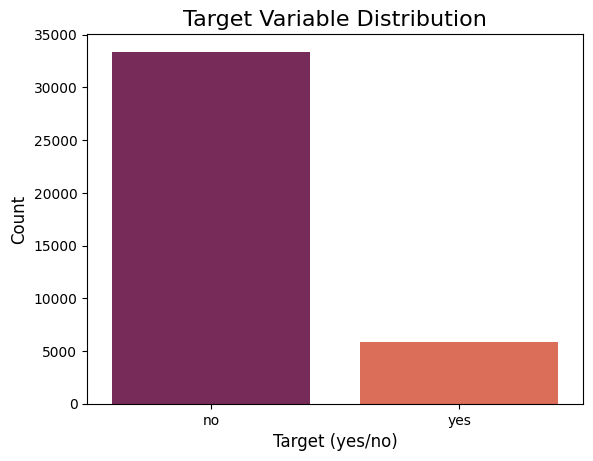

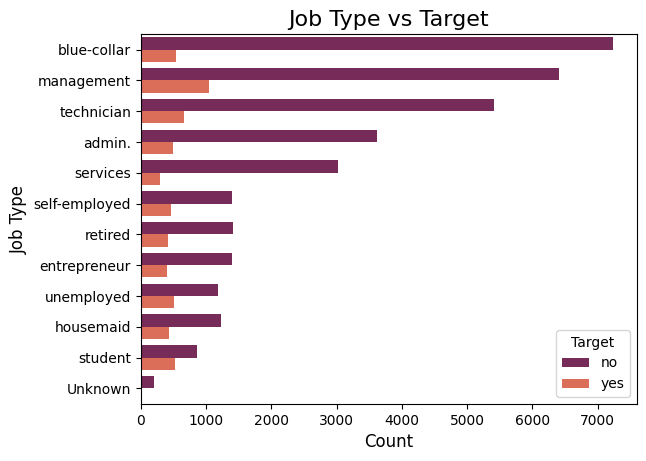

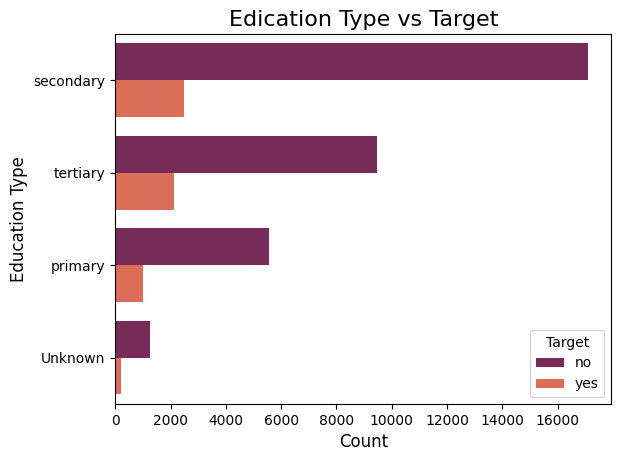

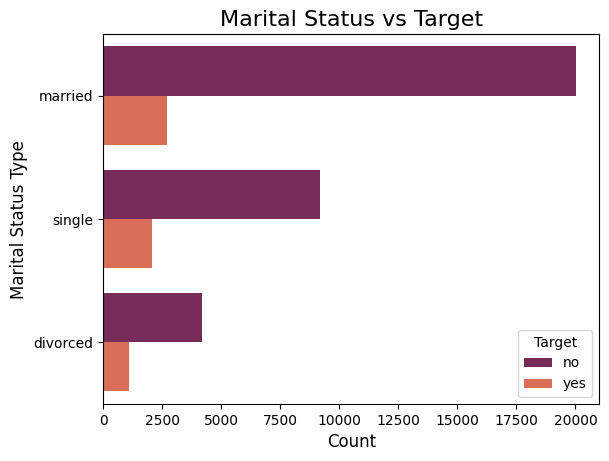

In [11]:
data = df_train.copy()

# Chanding color pallete
sns.color_palette("mako", as_cmap=True)




# Handle missing values by filling with 'Unknown' for categorical features
for col in ['job', 'education', 'contact', 'poutcome']:
    data[col] = data[col].fillna('Unknown')



plt.figure(figsize=(12, 12))

# Plotting the target variable distribution
plt.subplots(1, 1)
sns.countplot(x='target', data=data, palette='rocket')
plt.title('Target Variable Distribution', fontsize=16)
plt.xlabel('Target (yes/no)', fontsize=12)
plt.ylabel('Count', fontsize=12)



# Plotting job types against the target variable
plt.subplots(1, 1)
sns.countplot(y='job', hue='target', data=data, palette='rocket', order=data['job'].value_counts().index)
plt.title('Job Type vs Target', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Type', fontsize=12)
plt.legend(title='Target', loc='lower right')



# Plotting education types against the target variable
plt.subplots(1, 1)
sns.countplot(y='education', hue='target', data=data, palette='rocket', order=data['education'].value_counts().index)
plt.title('Edication Type vs Target', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Type', fontsize=12)
plt.legend(title='Target', loc='lower right')
plt.show()



plt.subplots(1, 1)
sns.countplot(y='marital', hue='target', data=data, palette='rocket', order=data['marital'].value_counts().index)
plt.title('Marital Status vs Target', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Marital Status Type', fontsize=12)
plt.legend(title='Target', loc='lower right')
plt.show()




from above graphs we can understand





*- In job types,  Blue collar job has high failure (label 'no') rate*



*- In education, secondary education has high failure (label 'no') rate*



*- Married people has highest count of no compoared to single and divorced people.*


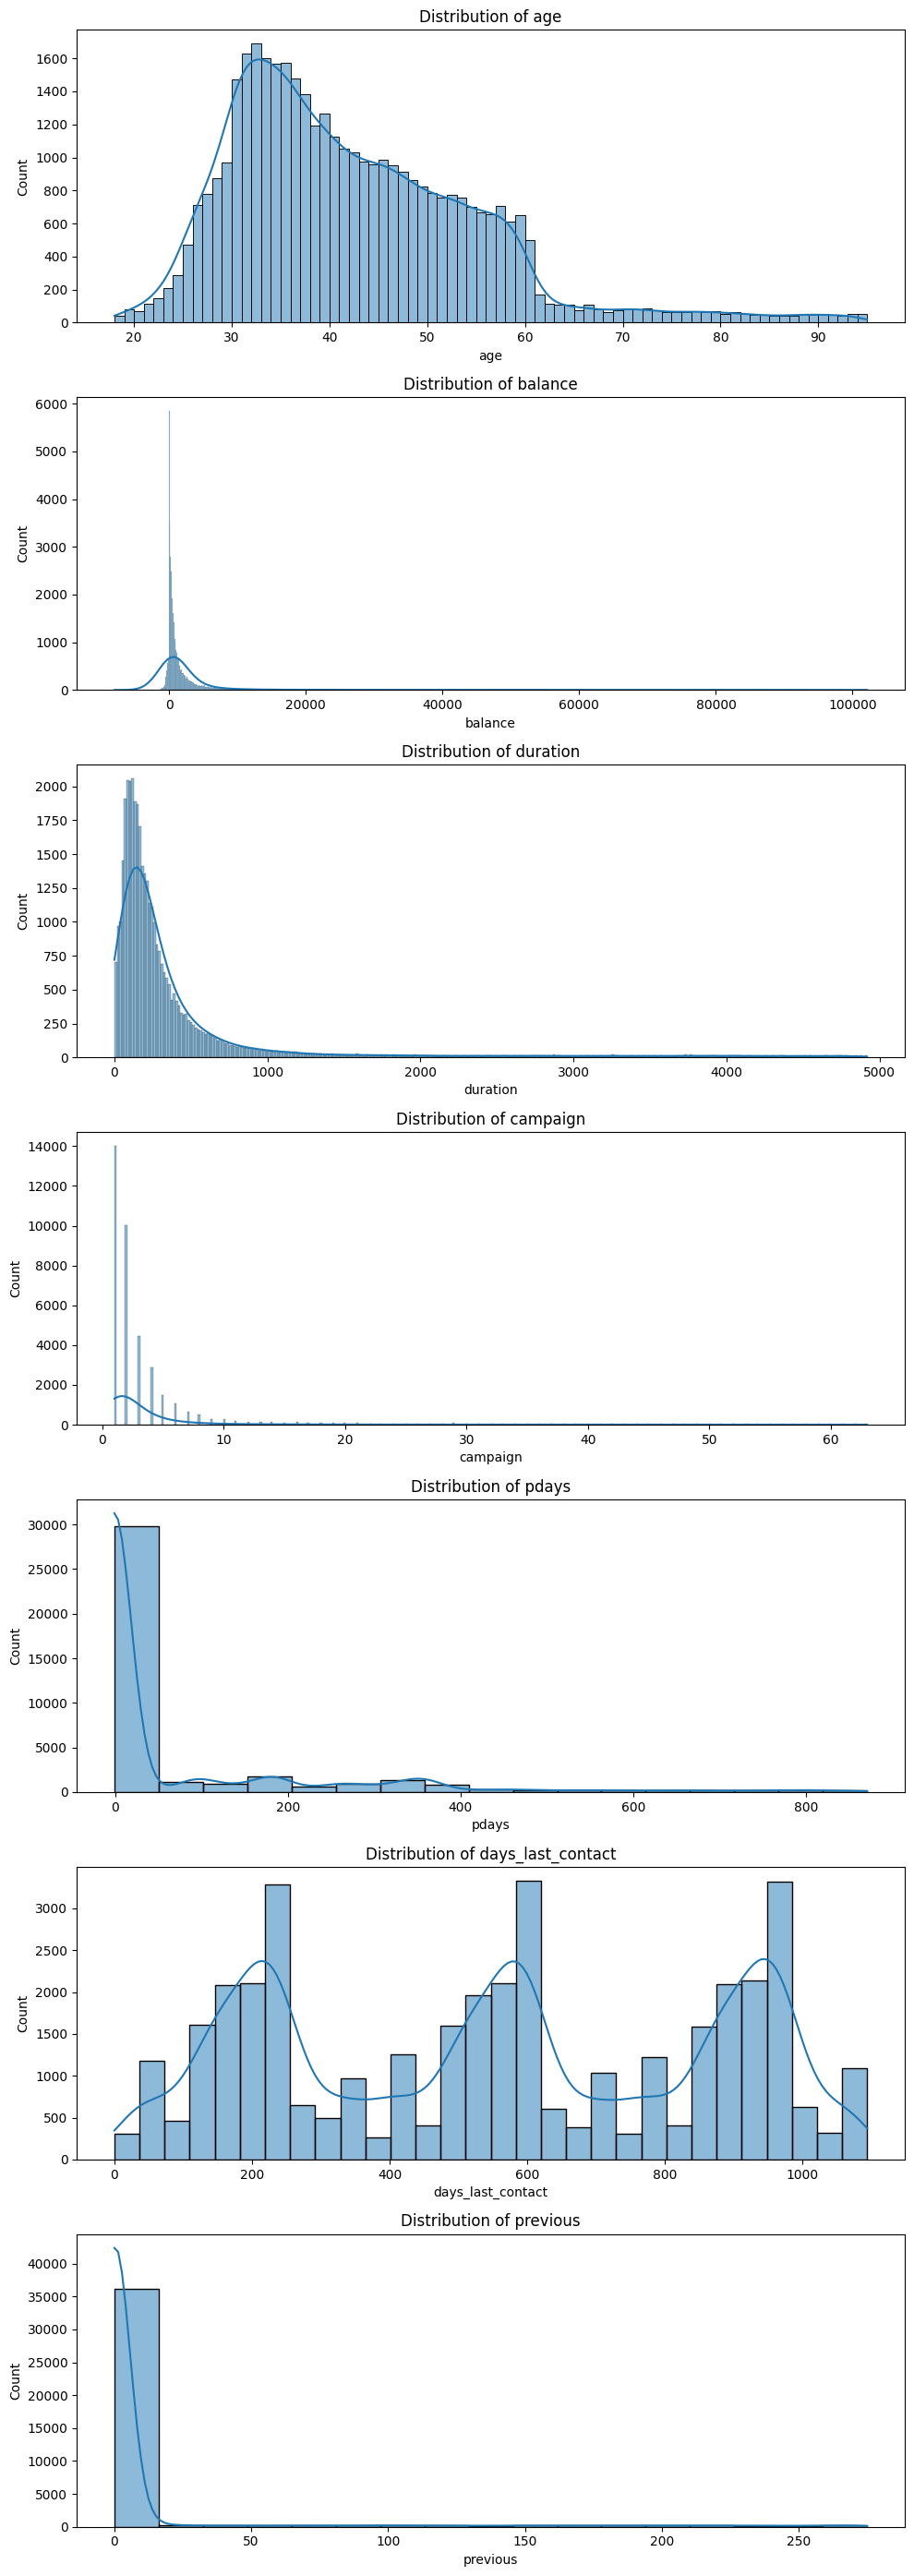

In [12]:
#Distribution analysis

data = df_train.copy()

numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays','days_last_contact','previous']

data = data[numerical_cols].fillna(0)

fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 4 * len(numerical_cols)))



for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

## *Key Insights from Visualizations:*

**Age Distribution:**





- *The majority of individuals fall within the 20–60 age range.*

- *The distribution has a slight right skew, indicating a few older individuals in the dataset.*



**Target Variable Distribution:**



- *The dataset is imbalanced, with significantly more "no" responses than "yes".*

- *This imbalance suggests a potential need for strategies like resampling during modeling.*



**Job Type vs Target:**



- *Certain job categories, like "admin.", "blue-collar," and "technician," have a higher count of individuals.*

- *The target "yes" is relatively more common in job types like "management" and "entrepreneur."*

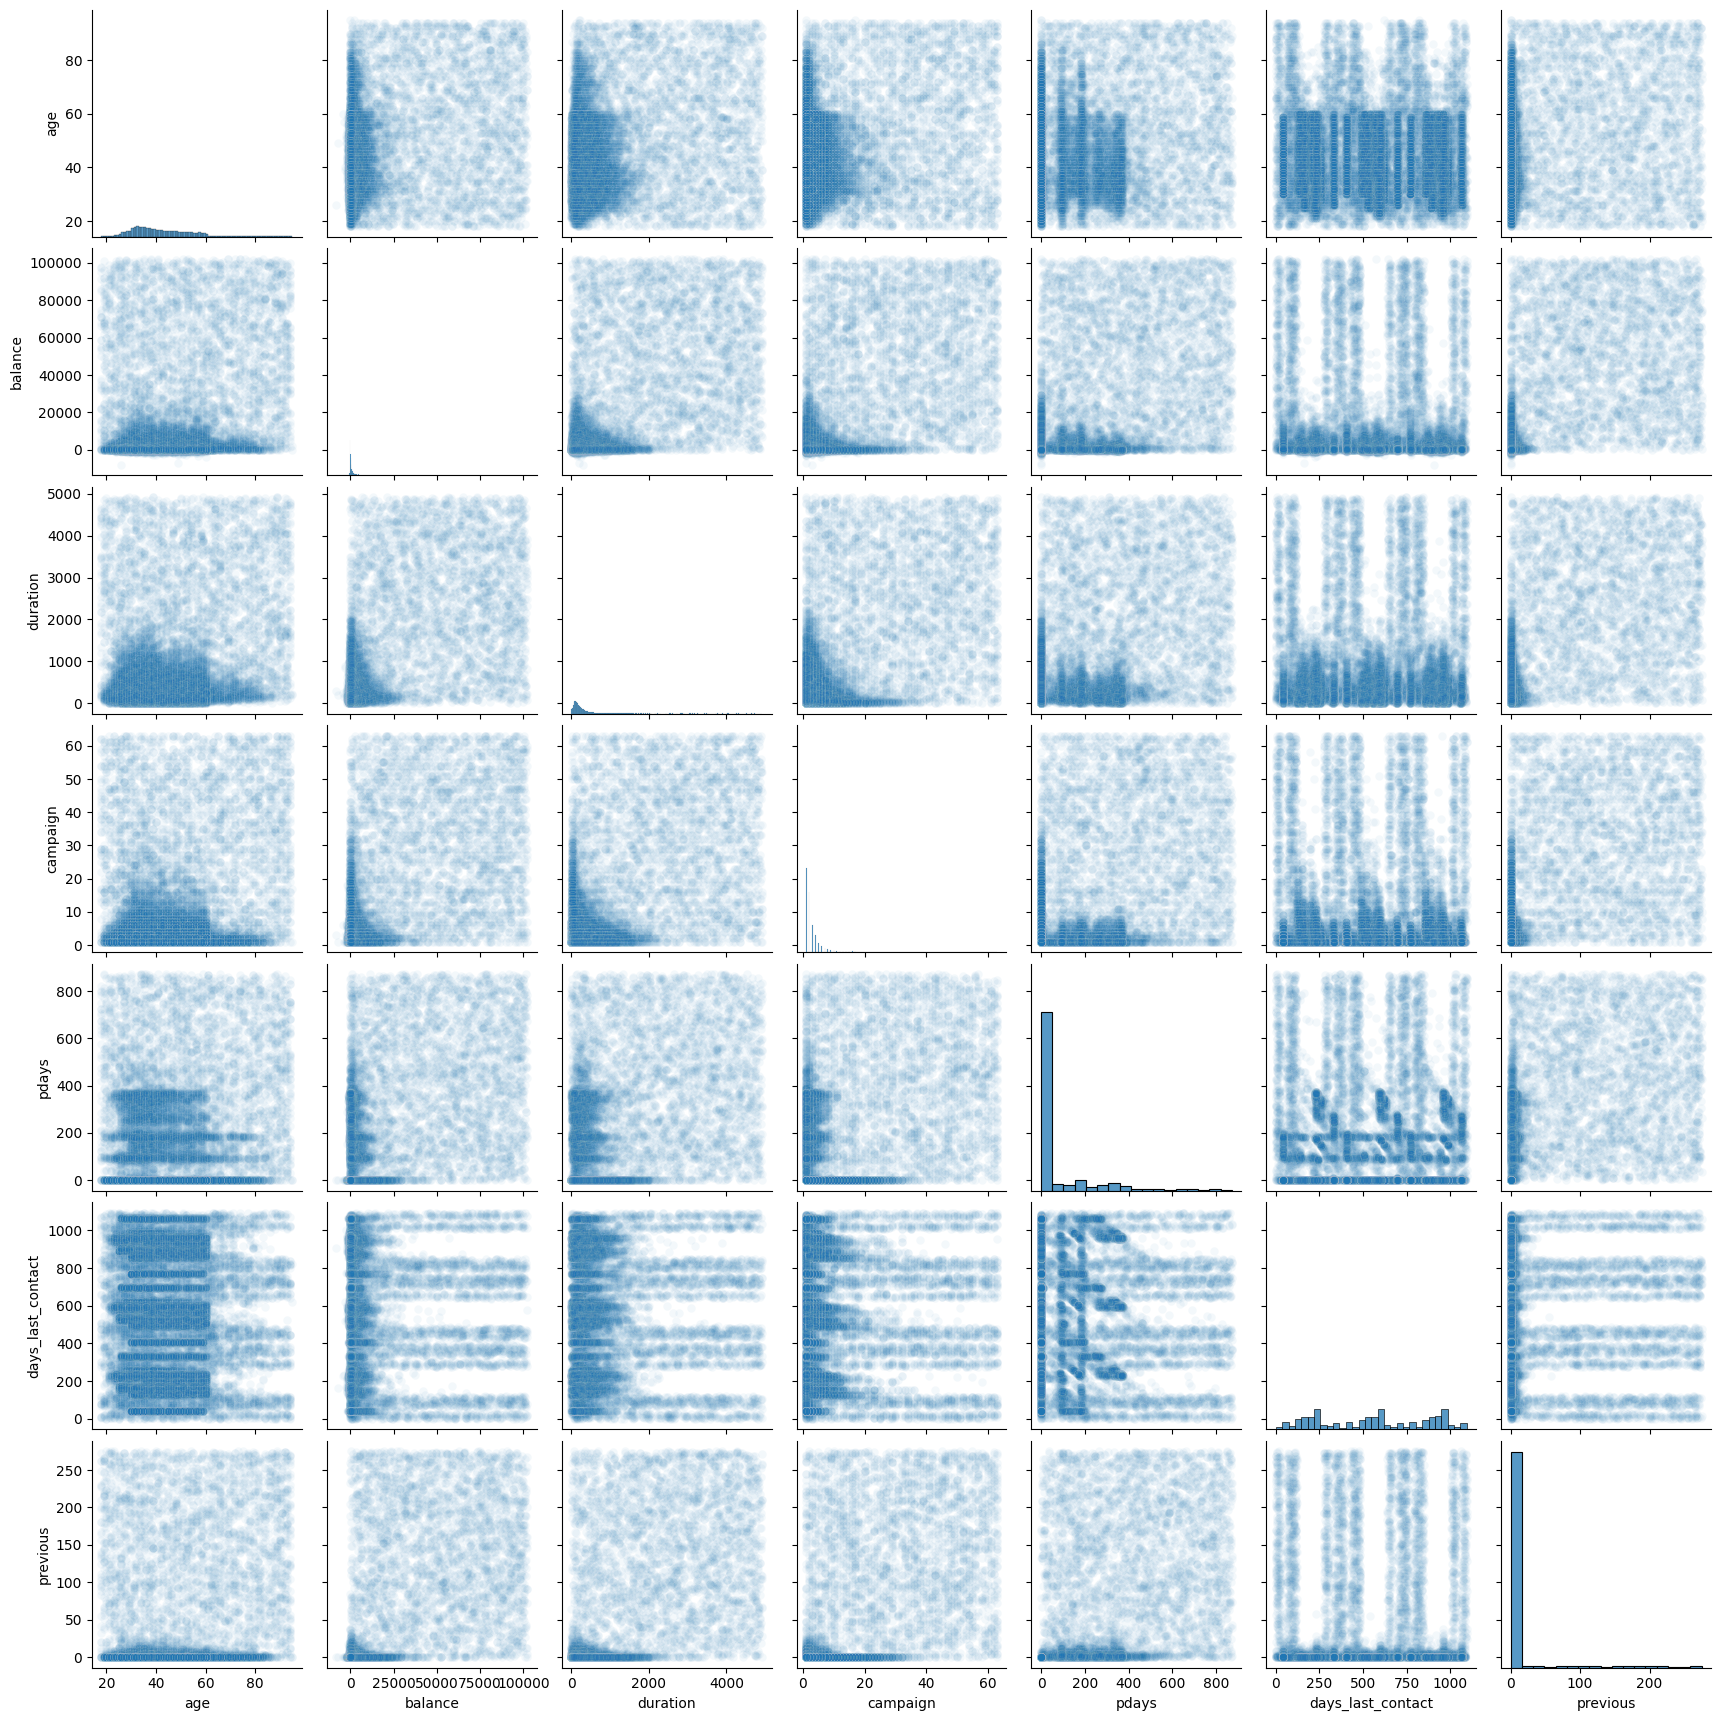

In [13]:
# Pairplot

pairplot_data = data[numerical_cols]

sns.pairplot(pairplot_data, plot_kws=dict(alpha=0.05))
plt.show()

- Most relationships in the scatter plots appear weak or non-linear.

- Variables like duration, balance, and pdays have significant skewness.

- Certain variables, such as days_last_contact is limited discrete values.

- Balance and Duration contains outliers

## *Correlation between numerical variables*

In [14]:
# num_columns = ['age','balance','duration','pdays','target','campaign', 'pdays']

corr_df = df_train.copy()
corr_df['target'] = corr_df.target.map({"yes": 1, "no": 0})

corr = corr_df.corr(numeric_only=True)

# Zero Matrix
matrix = np.triu(np.ones_like(corr))


print(corr)

                   days_last_contact       age   balance  duration  campaign  \
days_last_contact           1.000000 -0.030679 -0.031070 -0.013495 -0.030257   
age                        -0.030679  1.000000  0.289150  0.255573  0.269439   
balance                    -0.031070  0.289150  1.000000  0.669737  0.674339   
duration                   -0.013495  0.255573  0.669737  1.000000  0.630944   
campaign                   -0.030257  0.269439  0.674339  0.630944  1.000000   
pdays                      -0.006589  0.199507  0.562097  0.527020  0.519469   
previous                   -0.023038  0.277487  0.716816  0.683951  0.689211   
target                     -0.013385  0.111939  0.257863  0.343325  0.217205   

                      pdays  previous    target  
days_last_contact -0.006589 -0.023038 -0.013385  
age                0.199507  0.277487  0.111939  
balance            0.562097  0.716816  0.257863  
duration           0.527020  0.683951  0.343325  
campaign           0.519469  

### *Heatmap of Correlation*

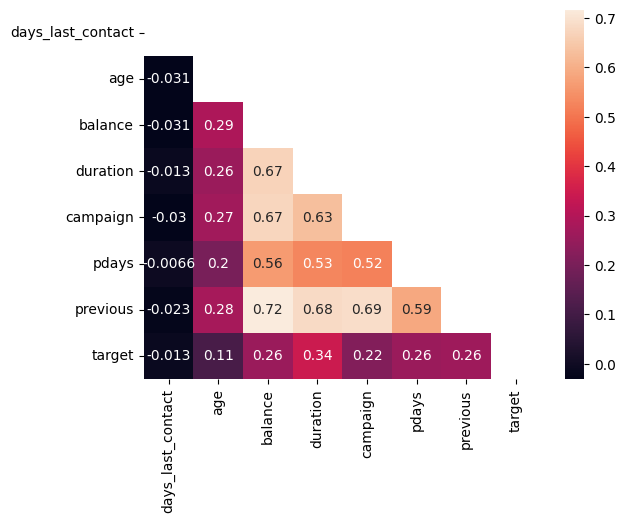

In [15]:
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

# *Preprocessing Data*

In [16]:
from sklearn.model_selection import train_test_split

# Storing Features and target to different variables
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

**Column Transformation**



- *for `categorical` features we using simple imputer to fill value as unknown in missing values cells and applying `OneHotEncoder` which will ignore column for unknown values*

  

- for binary columns like deafult,housing,loan we using `OrdinalEncoder` to convert yes or no to 1 and 0



- `RobusScaler` is used for scaling the ordinal numeric values
  - $ \dfrac{x_i - x_{median}}{ IQR} $

  

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder


# 
cat_pipeline = Pipeline([
    ('on_hot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])



col_tran = ColumnTransformer([
    ("pass", OrdinalEncoder(categories=[['no', 'yes']]*3), ["default", "housing", "loan"]),
    ("cat", cat_pipeline, ['job', 'marital', 'education', 'contact', 'poutcome']),
    ("num", RobustScaler(), ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous','days_last_contact'])
]).set_output(transform='pandas')

In [18]:
X_train.drop('last contact date', inplace=True, axis=1)

*definition of `evaluate_model`*

In [19]:
from sklearn.metrics import f1_score, accuracy_score,recall_score,precision_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, RocCurveDisplay

#class created for storing each model's score and other info
class ModelGrading:
    
    score_dic = {"model": [],"auc_train":[],"auc_test":[], "f1": [],"accuracy_train":[],"recall":[],"precision":[], "accuracy": [],"class":[],"params":[],"conf_m":[]}
    
    def evaluate_model(self,model,X_train_f,y_true_f, X_test_f, y_test_f):
        
        y_val_pred = model.predict(X_test_f)
        y_true_pred =  model.predict(X_train_f)

        # add infos to master dictionary for final evaluation
        accuracy = accuracy_score(y_test_f, y_val_pred)
        accuracy_train = accuracy_score(y_true_f, y_true_pred)
        report = classification_report(y_test_f, y_val_pred)
        conf_matrix = confusion_matrix(y_test_f, y_val_pred,labels=[1,0])
        f1 = f1_score(y_test_f, y_val_pred, average='macro')
        auc_train = roc_auc_score(y_true_f,y_true_pred)
        auc_test = roc_auc_score(y_test_f,y_val_pred)
        recall =  recall_score(y_test_f,y_val_pred, pos_label=1)
        precision = precision_score(y_test_f,y_val_pred, pos_label=1)
        # add infos to master dictionary for final evaluation
        self.score_dic['model'].append(str(model['model']))
        self.score_dic['f1'].append(f1)
        self.score_dic['accuracy'].append(accuracy)
        self.score_dic['accuracy_train'].append(accuracy_train)
        self.score_dic['auc_train'].append(auc_train)
        self.score_dic['auc_test'].append(auc_test)
        self.score_dic['class'].append(model)
        self.score_dic['params'].append(model.get_params())
        self.score_dic['conf_m'].append(conf_matrix)
        self.score_dic['recall'].append(recall)
        self.score_dic['precision'].append(precision)
        
        self.print_score_string(model,f1,accuracy)
        self.print_conf_matrix(conf_matrix)   
        self.plot_auc_roc_curve(y_test_f, y_val_pred)
        return None
        


    def print_score_string(self,model,f1,accuracy):
        print(f"------- {str(model['model'])}---------")
        print("*" * 50)
        print(f"f1 score : {f1}")
        print(f"recall : {self.score_dic['recall'][-1]}")
        print(f"precision : {self.score_dic['precision'][-1]}")
        print("*" * 50)
        print(f"accuracy train : {self.score_dic['accuracy_train'][-1]}")
        print(f"accuracy test : {accuracy}")
        print("*" * 50)
        print(f"auc_train : {self.score_dic['auc_train'][-1]}")
        print(f"auc_test : {self.score_dic['auc_train'][-1]}")
        print("*" * 50)        
    
    def print_conf_matrix(self,conf_matrix):
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()


    def plot_auc_roc_curve(self,y_test, y_pred):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        roc_display.figure_.set_size_inches(5,5)
        plt.plot([0, 1], [0, 1], color = 'g')

    def get_final_report(self):
        return self.score_dic
    
    def get_final_df(self):
        return pd.DataFrame(self.score_dic,columns=['model','f1','accuracy','auc_train','auc_test'])

model_eval = ModelGrading()

In [20]:
# Label converter from "Yes/No" to 1 and 0 and vice versa

class LabelConverter:
    def to_int(self, y):
        return y.map({"yes": 1, "no": 0})


    def to_string(self, y):
        return y.map({1: "yes", 0: "no"})


    def to_string_np(self, y):
        return np.where(y == 1, "yes", "no")



label_converter = LabelConverter()

# *Model Building*

### *Balancing Data using SMOTE*

### ***SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets***

In [21]:
# Impute and Transform Column to Number
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OneHotEncoder


# ohe = OneHotEncoder(handle_unknown='ignore')

sm = SMOTENC(sampling_strategy=0.4,k_neighbors=10, categorical_features=['job','marital', 'education','default','housing','loan','contact','poutcome'])
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train)



#applying new sampled for imputation and scaling with column transformer
X_train_final = col_tran.fit_transform(X_train_sampled)
# getting new feature names
feature_names = X_train_final.columns
# Changing Yes/No to 1/0
y_train_int = label_converter.to_int(y_train_sampled)


X_train_sm, y_train_sm = X_train_final, y_train_int


#Applying same for test data
X_test_final = col_tran.fit_transform(X_test)
y_test_int = label_converter.to_int(y_test)

## Logistic Regression

------- LogisticRegression(max_iter=1000, random_state=42)---------
**************************************************
f1 score : 0.6488993935553891
recall : 0.632120796156486
precision : 0.34429906542056077
**************************************************
accuracy train : 0.7972498787550281
accuracy test : 0.7663980414158931
**************************************************
auc_train : 0.6853225513594773
auc_test : 0.6853225513594773
**************************************************


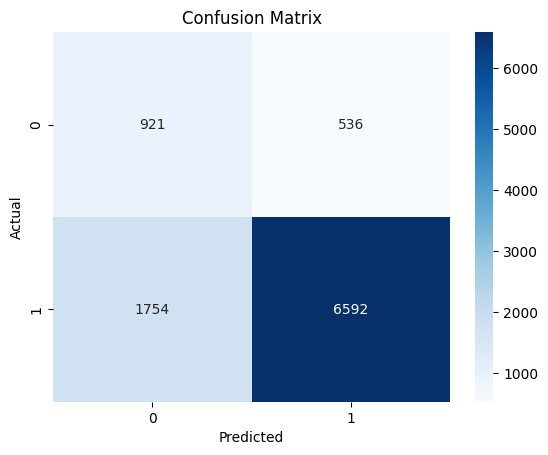

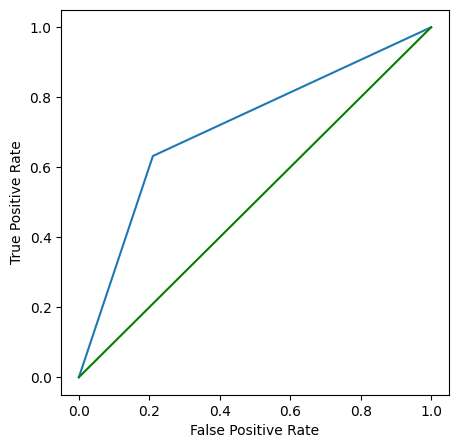

In [22]:
from sklearn.linear_model import LogisticRegression

Logi_model = LogisticRegression(max_iter=1000,random_state=42)

Logi_pipeline = Pipeline([
    ('model',Logi_model)
])

Logi_pipeline.fit(X_train_sm,y_train_sm)

model_eval.evaluate_model(Logi_pipeline,X_train_sm,y_train_sm,X_test_final,y_test_int)

## *Randon Forest Classifier*

------- RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=7,
                       n_estimators=352, random_state=42)---------
**************************************************
f1 score : 0.7033394878102399
recall : 0.634866163349348
precision : 0.4336615096108767
**************************************************
accuracy train : 0.9997147177131772
accuracy test : 0.8225033153116393
**************************************************
auc_train : 0.9995007488766849
auc_test : 0.9995007488766849
**************************************************


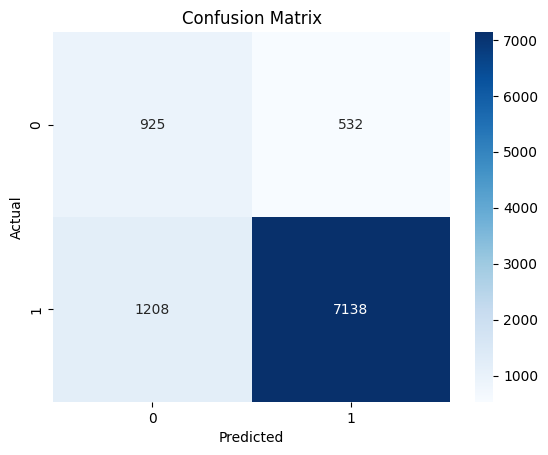

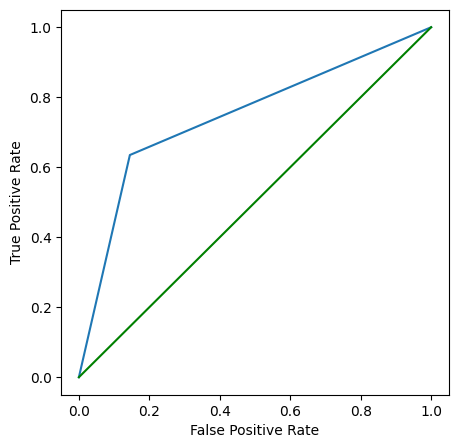

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif

RDF_model = RandomForestClassifier(random_state=42)

RDF_pipeline = Pipeline([
    ('model',RDF_model)
])

RDF_pipeline.set_params(model__bootstrap= False, model__max_depth= 40, model__min_samples_leaf= 1, model__min_samples_split= 7, model__n_estimators= 352)


RDF_pipeline.fit(X_train_sm,y_train_sm)

model_eval.evaluate_model(RDF_pipeline,X_train_sm,y_train_sm,X_test_final,y_test_int)

In [24]:
# # Cross Validation

# from sklearn.model_selection import RandomizedSearchCV

#

# from scipy.stats import randint

# # Defining the hyperparameter distribution

# param_dist = {
#     'rdf__n_estimators': randint(100, 500),
#     'rdf__max_depth': [None, 10, 20, 30, 40, 50],
#     'rdf__min_samples_split': randint(2, 11),
#     'rdf__min_samples_leaf': randint(1, 5),
#     'rdf__bootstrap': [True, False]

# }

#

#

# random_search = RandomizedSearchCV(estimator=est_pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2, random_state=42)
# # fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

#

# # Output the best parameters and best score

# best_params= random_search.best_params_

# best_score = random_search.best_score_

# print("Best Parameters:", best_params)

# print("Best Accuracy:", best_score)

In [25]:
# Best params
# model__bootstrap= False, model__max_depth= 40, model__min_samples_leaf= 1, model__min_samples_split= 7, model__n_estimators= 352

## Support Vector Machine

------- SVC(random_state=42)---------
**************************************************
f1 score : 0.6696667851425312
recall : 0.7419354838709677
precision : 0.3640956551027282
**************************************************
accuracy train : 0.8222691353093886
accuracy test : 0.7690502907273283
**************************************************
auc_train : 0.7446837172948939
auc_test : 0.7446837172948939
**************************************************


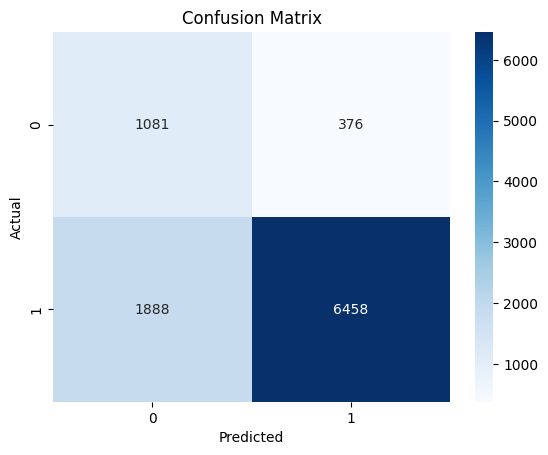

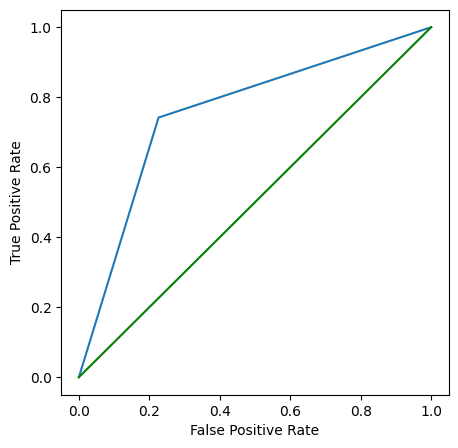

In [26]:
from sklearn.svm import SVC
SVC_model = SVC(random_state=42)

svm_pipeline = Pipeline([
    ('model',SVC_model)
])


svm_pipeline.fit(X_train_sm,y_train_sm)

model_eval.evaluate_model(svm_pipeline,X_train_sm,y_train_sm,X_test_final,y_test_int)

## XGBoost

------- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0259, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)---------
**************************************************
f1 score : 0.7415607398603843
recall : 0.7412491420727523
precision : 0.4778761061946903
**************************************************
accuracy train : 0.8426097623598551
accura

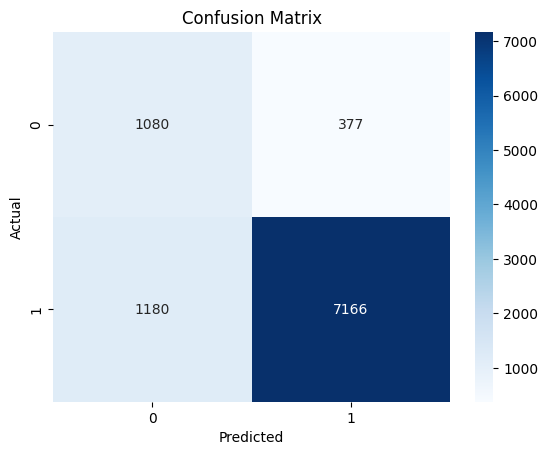

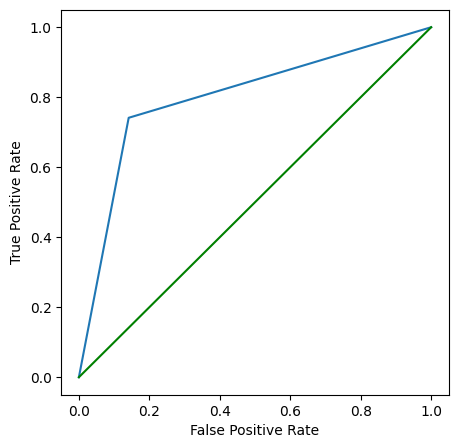

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif


XGB_model = XGBClassifier(eval_metric='logloss', random_state=42)

XGB_pipeline = Pipeline([
    # ('k_features',SelectKBest(f_classif,k=25)),
    ('model', XGB_model)
])

XGB_pipeline.set_params(model__subsample=0.01, model__n_estimators= 140, model__min_child_weight= 3,
                        model__max_depth= 5, model__learning_rate= 0.0259, model__gamma= 1,
                        model__colsample_bytree= 1,model__reg_alpha=0.75,model__reg_lambda=0.1  )



# Fit the pipeline
XGB_pipeline.fit(X_train_sm, y_train_sm)

model_eval.evaluate_model(XGB_pipeline,X_train_sm,y_train_sm, X_test_final, y_test_int)

### HPT (XGBoost)

In [28]:
# from sklearn.metrics import f1_score
# params = {
#     'model__n_estimators': [50,100,140,160,200,500],  # Number of trees
#     'model__learning_rate': [0.1,0.2,0.5,0.01],  # Learning rate
#     'model__max_depth': [2,3,5,7],  # Maximum tree depth
#     'model__min_child_weight': [0.1,0.2,1,3,5],  # Minimum sum of instance weight
#     'model__subsample': [0.1,0.2,0.5],  # Subsample ratio
#     'model__colsample_bytree': [0.5,0.75,1],  # Subsample ratio for columns
#     'model__gamma': [0.1,0.5,1],  # Regularization parameter,
#     'model__reg_alpha':[1,0.5],
#     'model__reg_lambda':[0.1,0.5]
# }

# random_search = RandomizedSearchCV(
#     XGB_pipeline,
#     params,
#     n_iter=300,  # Number of parameter settings to sample
#     scoring='f1_macro',  # Evaluation metric
#     cv=4,  # -fold cross-validation
#     verbose=1,
#     random_state=42,
#     n_jobs=-1,  # Use all available processors
# )

# print("Finding best parameters.....")

# random_search.fit(X_train_sm, y_train_sm)


# # Display the best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validation Accuracy:", random_search.best_score_)

# # Evaluate on test set
# test_accuracy = random_search.best_estimator_.score(X_test_final, y_test_int)
# print("Test Accuracy:", test_accuracy)

# model_eval.evaluate_model(random_search.best_estimator_,X_train_sm,y_train_sm, X_test_final, y_test_int)


In [29]:
# Best Parameters: {'xgb__subsample': 0.6938775510204082, 'xgb__n_estimators': 98, 'xgb__min_child_weight': 0.04281332398719394, 'xgb__max_depth': 16, 'xgb__learning_rate': 0.09999999999999995, 'xgb__gamma': 0.01, 'xgb__colsample_bytree': 1.0}

In [30]:
final_analysis = model_eval.get_final_report()

top_index = (final_analysis['f1'].index(max(final_analysis['f1'])))

best_model = final_analysis['class'][top_index]

model_eval.get_final_df()

model        f1  accuracy  \
0  LogisticRegression(max_iter=1000, random_state...  0.648899  0.766398   
1  RandomForestClassifier(bootstrap=False, max_de...  0.703339  0.822503   
2                               SVC(random_state=42)  0.669667  0.769050   
3  XGBClassifier(base_score=None, booster=None, c...  0.741561  0.841171   

   auc_train  auc_test  
0   0.685323  0.710980  
1   0.999501  0.745063  
2   0.744684  0.757860  
3   0.803825  0.799932

In [31]:
final_choosen_estimator  = XGB_pipeline

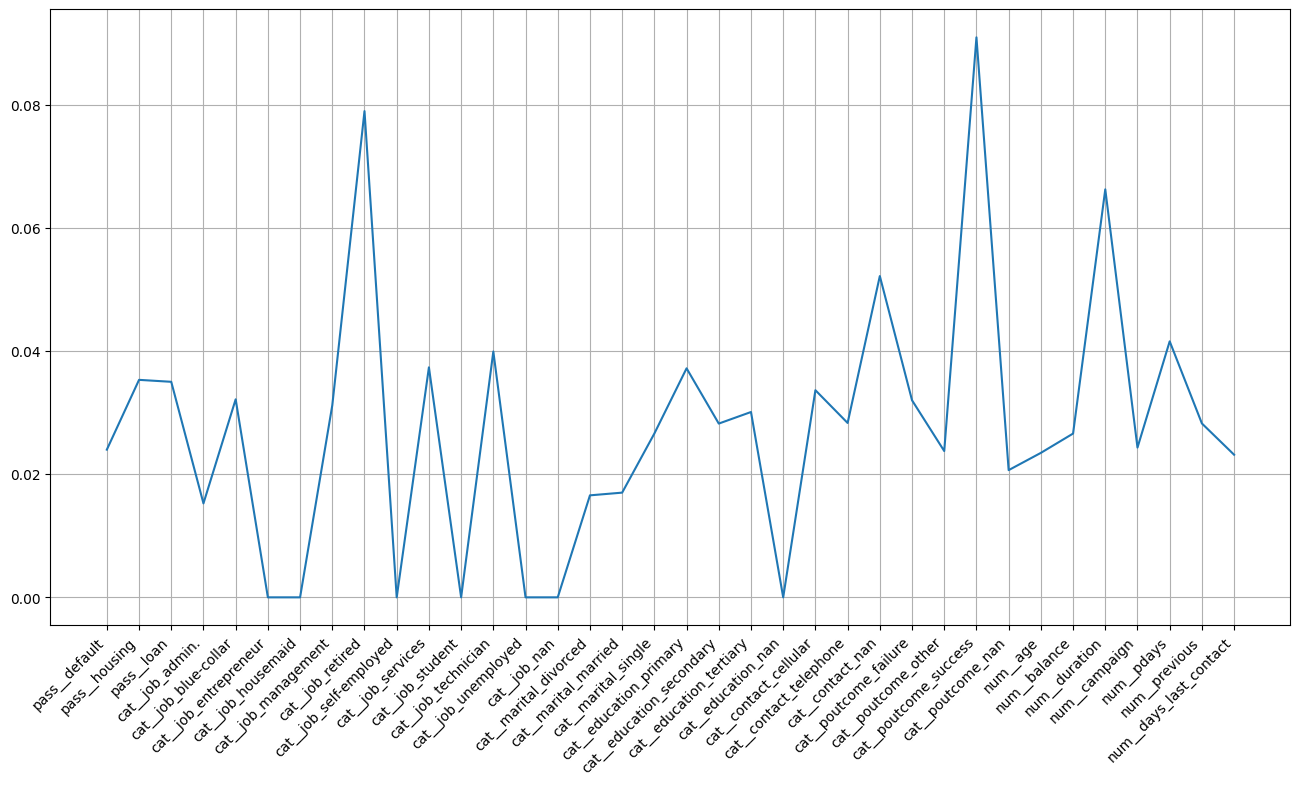

In [32]:

importances = final_choosen_estimator['model'].feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(forest_importances)
plt.xticks(rotation=45, ha='right')
plt.show()

### Number of times a feature appears in a tree

<Figure size 2000x2600 with 0 Axes>

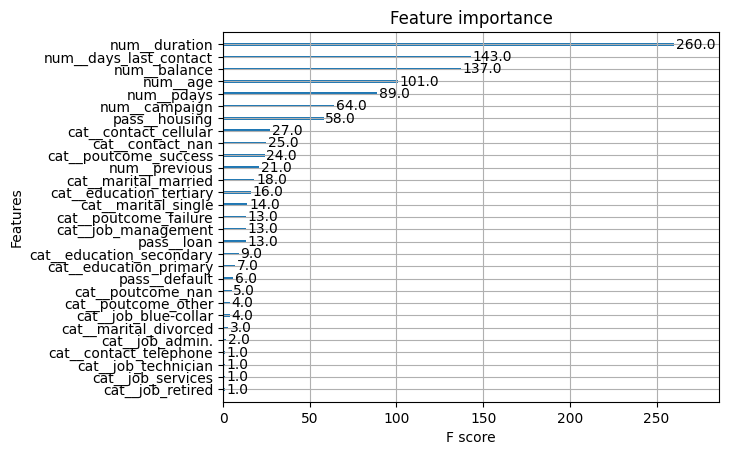

In [33]:
from xgboost import plot_importance

plt.figure(figsize=(20,26))
plot_importance(final_choosen_estimator['model'])
plt.show()

------- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0259, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)---------
**************************************************
f1 score : 0.7415607398603843
recall : 0.7412491420727523
precision : 0.4778761061946903
**************************************************
accuracy train : 0.8426097623598551
accura

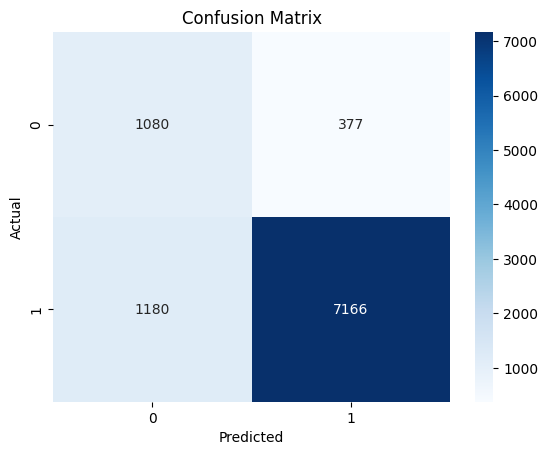

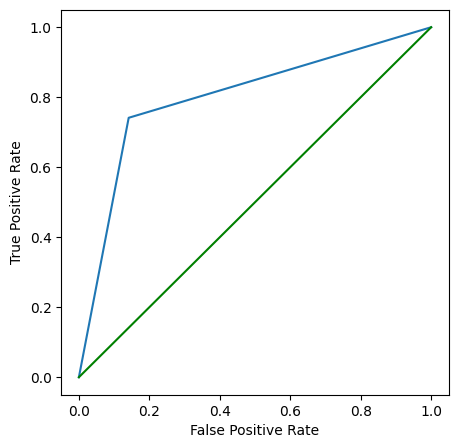

In [34]:
final_choosen_estimator.fit(X_train_sm, y_train_sm)
model_eval.evaluate_model(final_choosen_estimator,X_train_sm,y_train_sm, X_test_final, y_test_int)

## *Submission Section*

In [35]:
df_test_changed = col_tran.fit_transform(df_test)

In [36]:
df_test_changed.shape

(10000, 36)

In [37]:
y_test_csv_int = final_choosen_estimator.predict(df_test_changed)

In [38]:
y_test_csv_string = np.where(y_test_csv_int == 1, "yes", "no")

In [39]:
def save_file_for_submission(y_predict):
    predication_format = {"id": range(0, y_predict.shape[0]), "target": y_predict}
    submission = pd.DataFrame(predication_format)
    submission.to_csv("submission.csv", index=False, encoding='utf-8')
    print("submission saved")

In [40]:
save_file_for_submission(y_test_csv_string)

submission saved
